# Dataset link
- https://drive.google.com/file/d/12LATXJdI33XujBRrIwryKv_1GNqD2o19/view

- analisis sentimen rating aplikasi di tiktok di playstore

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Cleaning Data

In [2]:
df = pd.read_csv('tiktok.csv')
print(df.shape)
df.head()

(398, 11)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8c029d6c-9282-4034-9838-53f957384007,Amin Santoso,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5,622,34.3.3,2024-04-20 20:26:25,NaN,NaN,34.3.3
1,5be47d92-8ede-4f9a-a613-3107e9bfbde2,monica hsu,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya suka dengan aplikasi tiktok dan aktif men...,5,1332,33.8.5,2024-03-13 23:45:22,NaN,NaN,33.8.5
2,a8d020fa-07ac-46e1-9ec1-9a1d6b24abec,Oppo A16,https://play-lh.googleusercontent.com/a/ACg8oc...,Maaf saya kasih 🌟 2 karena aplikasi nya kurang...,2,30,34.5.5,2024-05-04 02:50:04,NaN,NaN,34.5.5
3,26fbfb0b-c11b-46e5-8e8b-d9a2803615ee,Verdi Ximenes,https://play-lh.googleusercontent.com/a-/ALV-U...,Tiktok nya sangat bagus tapi pas di buka video...,3,57,33.8.5,2024-04-18 20:02:07,NaN,NaN,33.8.5
4,07d94c25-28a3-4b6d-a404-720513cf1c9a,Nenk shinta,https://play-lh.googleusercontent.com/a-/ALV-U...,Kenapa dengan tiktok saya pas buka muter muter...,2,1799,34.1.5,2024-04-08 15:41:52,NaN,NaN,34.1.5


- kita nanti akan menggunakan kolom content dan score nya saja

In [3]:
# memilih kolom
df = df[['content','score']]
df

,content,score
0,Tiktok sangat bagus. Bisa berkarya dan mendapa...,5
1,Saya suka dengan aplikasi tiktok dan aktif men...,5
2,Maaf saya kasih 🌟 2 karena aplikasi nya kurang...,2
3,Tiktok nya sangat bagus tapi pas di buka video...,3
4,Kenapa dengan tiktok saya pas buka muter muter...,2
...,...,...
393,Hallo saya sangat kecewa sama tiktok karena sa...,1
394,Aplikasi ini sangat penting untuk menghibur da...,5
395,"aplikasi ini sangat bagus dan menghibur, tapi ...",5
396,Banyak ilmu yang didapat dan untuk pengalaman ...,5


In [4]:
# menghilangkan duplicate value
df = df.drop_duplicates(subset='content')
df.shape

(398, 2)

In [5]:
# menghilangkan data yang kosong
df = df.dropna()
df.shape

(398, 2)

In [6]:
# menghapus beberapa simbol dan emot
def clean_tiktok_data(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['content'] = df['content'].apply(clean_tiktok_data)

In [7]:
df['content'] = df['content'].str.lower()

In [8]:
df.head()

,content,score
0,tiktok sangat bagus bisa berkarya dan mendapat...,5
1,saya suka dengan aplikasi tiktok dan aktif men...,5
2,maaf saya kasih 2 karena aplikasi nya kurang b...,2
3,tiktok nya sangat bagus tapi pas di buka video...,3
4,kenapa dengan tiktok saya pas buka muter muter...,2


# Preprocessing

In [9]:
score = df['score']

In [10]:
def filter_tokens_by_lenght(dataframe, column, min_words, max_words):
    words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
    mask = (words_count >= min_words) & (words_count <= max_words)
    filtered_df = dataframe[mask]
    return filtered_df

min_words = 3 # gunakan minimal 3 kata yang muncul ( dibawah 3 kata semua data tersbut diabaikan)
max_words = 50 # gunakan maksimal 50 kata yang muncul

df = filter_tokens_by_lenght(df, 'content', min_words, max_words)

In [11]:
df['content']

0      tiktok sangat bagus bisa berkarya dan mendapat...
2      maaf saya kasih 2 karena aplikasi nya kurang b...
3      tiktok nya sangat bagus tapi pas di buka video...
4      kenapa dengan tiktok saya pas buka muter muter...
5      makin di update malah oploadnya selalu gagal m...
                             ...                        
393    hallo saya sangat kecewa sama tiktok karena sa...
394    aplikasi ini sangat penting untuk menghibur da...
395    aplikasi ini sangat bagus dan menghibur tapi s...
396    banyak ilmu yang didapat dan untuk pengalaman ...
397    filter ada yang tidak bisa dipakai walaupun su...
Name: content, Length: 381, dtype: object

In [12]:
# normalisasi
# di norm masih banyak kata yang harus diganti

norm = {'gk' :'tidak', 'profisional' : 'profesional', 'skrg':'sekarang','uwang':'uang', 'tiktokan':'tiktok', 'yg':'yang','udh':'udah', 'muter':'puter', 'apk':'aplikasi','quota':'kuota','notivikasi':'notifikasi','anjj':'anjing','coin':'koin','Tik tok' : 'tiktok','gass':'gas','vt':'video','byk':'banyak','nglag':'lag','thebest':'terbaik','karya':'karya','karyaan':'karya', 'pdhl':'padahal', 'kalo':'kalau', 'kali':'kalau','life':'live','play store':'playstore','y':'iya','muser':'putar','kterangan':'keterangan','krn':'karena','kebanet':'banned','pljrn':'pelajaran','kng':'kang','Apknya':'aplikasi', 'kumatt':'kumat','g':'tidak','d':'di','top up':'topup','trms':'terima kasih','aja':'saja','trus':'terus','upgratny':'upgrade','campur2':'campur','cuman':'cuma','zangan':'jangan','berkariyaa':'berkarya','saiyaa':'saya','santidiakat':'sangat','pentintidiak':'penting','batidiakus':'bagus', 'dian':'dan','diipakai':'dipakai','adia':'dia','tidiak':'tidak','mentidakhibur':'menghibur','diidiapat':'dapat','iyaantidak':'iya','kurantidak':'kurang','mendiapat':'mendapat','dii':'di','baniyaak':'banyak','dientidakan':'dihentikan','tidakmenghibur':'tidak menghibur','updiate':'update',}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

In [13]:
import Sastrawi
# Sastrawi adalah pustaka Python yang digunakan untuk melakukan stemming pada teks dalam bahasa Indonesia. 
# Stemming adalah proses mengubah kata yang terikat atau memiliki imbuhan menjadi bentuk dasarnya.
# Misalnya, kata "bermain" akan diubah menjadi "main".

In [14]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words =[]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover.remove(str_text)
    return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))



In [15]:
# tokenize
tokenized = df['content'].apply(lambda x: x.split())
tokenized

0      [tiktok, sangat, bagus, berkarya, mendapat, te...
2      [maaf, kasih, 2, aplikasi, niyaa, kurang, bagu...
3      [tiktok, niyaa, sangat, bagus, pas, buka, vidi...
4      [dihentikan, tiktok, pas, buka, puter, puter, ...
5      [makin, update, malah, oploadiniyaa, selalu, t...
                             ...                        
393    [hallo, sangat, kecewa, sama, tiktok, saya, su...
394    [aplikasi, sangat, penting, menghibur, menarik...
395    [aplikasi, sangat, bagus, menghibur, sayantida...
396    [banyak, ilmu, iya, dan, pentidakalaman, diset...
397    [filter, iya, bisa, dipakai, walaupun, sudiah,...
Name: content, Length: 381, dtype: object

In [16]:
# stemming
# menghapus kata imbuhan contoh didapat menjadi dapat
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do =[] 
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean
    
tokenized = tokenized.apply(stemming)

tiktok sangat bagus karya dapat teman banyak ari berbatidakai diaerah jika beruntuntidak mentidakhasilkan cuan semotidaka tiktok tambah fitur berbatidakai fasilitas latidaki sukses andi maju tiktok
maaf kasih 2 aplikasi niyaa kurang bagus pdiahal jarintidakan full klw udiah buka kalau tidaka di buka lqi
tiktok niyaa sangat bagus pas buka vidieo niyaa nonton sudiah mentidakapai jadi tolontidak baik latidaki iyaakkk tiktok palintidak the best
henti tiktok pas buka puter puter pdiahal wifi penuh tidakambar niyaa puter hitam tidakak tidakambar niyaa tolontidak baik latidaki diontidak
makin update malah oploadiniyaa selalu tidakatidakal mulu slalu hapus terus tambah buruk nih aplikasi
terima kasih tik tok tolontidak tik tok iya di masuk alam perintidakat social populer atidakar mudiah mencariniyaa mentidakupdateniyaa terima kasih
aku suka sama nih tiktok aku serba tidakatidakal buat bikin vidieo aku aplodi jutidaka ntidaka diapat like
pokoniyaa bagus kalau lebih bagus latidaki efect kurang 

In [17]:
tokenized

0      tiktok sangat bagus karya dapat teman banyak a...
2      maaf kasih 2 aplikasi niyaa kurang bagus pdiah...
3      tiktok niyaa sangat bagus pas buka vidieo niya...
4      henti tiktok pas buka puter puter pdiahal wifi...
5      makin update malah oploadiniyaa selalu tidakat...
                             ...                        
393    hallo sangat kecewa sama tiktok saya sudiah pu...
394      aplikasi sangat penting hibur tarik waktu sedih
395    aplikasi sangat bagus hibur sayantidak hp siya...
396    banyak ilmu iya dan pentidakalaman tiap waktu ...
397    filter iya bisa pakai walaupun sudiah update b...
Name: content, Length: 381, dtype: object

In [18]:
# menyatukan kolom score dengan content
# menggabungkan kedua dataframe berdasarkan index
score.drop(columns='Unnamed: 0', inplace=True)
df = pd.concat([tokenized, score], axis=1)
df.head()


,content,score
0,tiktok sangat bagus karya dapat teman banyak a...,5
2,maaf kasih 2 aplikasi niyaa kurang bagus pdiah...,2
3,tiktok niyaa sangat bagus pas buka vidieo niya...,3
4,henti tiktok pas buka puter puter pdiahal wifi...,2
5,makin update malah oploadiniyaa selalu tidakat...,1


# Labeling

In [19]:
# membuat kolom baru dengan label sentimen

def label_sentiment(score):
    if score <= 2:
        return 'negative'
    # elif score == 3:
    #     return 'neutral'
    else:
        return 'positive'
    
df['sentimen'] = df['score'].apply(label_sentiment)
df.head()

,content,score,sentimen
0,tiktok sangat bagus karya dapat teman banyak a...,5,positive
2,maaf kasih 2 aplikasi niyaa kurang bagus pdiah...,2,negative
3,tiktok niyaa sangat bagus pas buka vidieo niya...,3,positive
4,henti tiktok pas buka puter puter pdiahal wifi...,2,negative
5,makin update malah oploadiniyaa selalu tidakat...,1,negative


In [20]:
sentiment_counts = df.sentimen.value_counts()
sentiment_counts

sentimen
positive    247
negative    151
Name: count, dtype: int64

# Vizualization

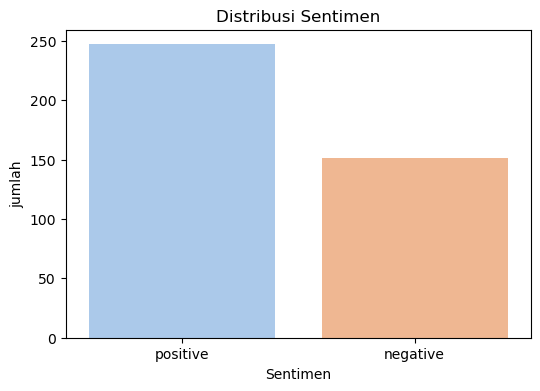

In [21]:
# visualisasi

sns.set_palette('pastel')
plt.figure(figsize=(6,4))
sns.countplot(x='sentimen', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('jumlah')
plt.show()

In [22]:
data_negatif = df[df['sentimen'] == 'negative']
data_positif = df[df['sentimen'] == 'positive']

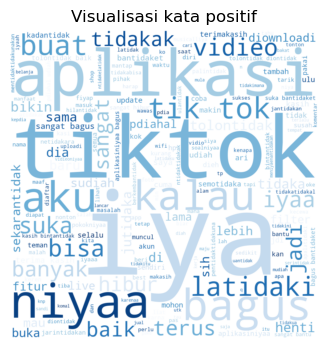

In [23]:
# visualisasi sentimen positif

# Mengganti nilai NaN dengan string kosong
data_positif['content'] = data_positif['content'].fillna('')

# Menggabungkan semua teks menjadi satu string panjang
all_text_s1 = ' '.join(str(word) for word in data_positif['content'])

# Membuat wordcloud
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)

# Menampilkan wordcloud
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualisasi kata positif')
plt.margins(x=0, y=0)
plt.show()

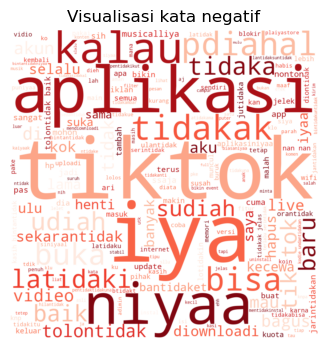

In [24]:
# visualisasi sentimen negatif

# Menggabungkan semua teks menjadi satu string panjang
all_text_s1 = ' '.join(str(word) for word in data_negatif['content'])

# Membuat wordcloud
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)

# Menampilkan wordcloud
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualisasi kata negatif')
plt.margins(x=0, y=0)
plt.show()

## insight
- dari hasil diatas ada kata pujian (bagus) jadi itu relevan dengan sentimen positif

# Splitting Data

In [25]:
X = df.content
y = df['sentimen']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training data (SVM, Naive Bayes, Random Forest)

In [26]:
cvec = CountVectorizer()
tvec = TfidfVectorizer()
hvec = HashingVectorizer()

In [27]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf1 = SVC(kernel='linear')
clf2 = MultinomialNB()
clf3 = RandomForestClassifier()

In [57]:
# # menggunakan pipeline

# from sklearn.pipeline import Pipeline

# model1 = Pipeline([('vectorizer', tvec),
#                    ('classifier',clf1)])

# model2 = Pipeline([('vectorizer', tvec),
#                    ('classifier',clf2)])

# model3 = Pipeline([('vectorizer', tvec),
#                    ('classifier',clf3)])

In [58]:
# model1.fit(X_train, y_train)

In [59]:
# Memisahkan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:


# Inisialisasi vectorizer dan classifier
# tvec = TfidfVectorizer()
clf1 = SVC(kernel='linear')
clf2 = MultinomialNB()
clf3 = RandomForestClassifier()

# Membuat pipeline model
model1 = Pipeline([('vectorizer', tvec), ('classifier', clf1)])
model2 = Pipeline([('vectorizer', tvec), ('classifier', clf2)])
model3 = Pipeline([('vectorizer', tvec), ('classifier', clf3)])



In [61]:
# Melatih model
model1.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [62]:
hasil1 = model1.predict(X_test)

In [63]:
matrix = classification_report(y_test, hasil1)
print('classification_report : \n', matrix)

classification_report : 
               precision    recall  f1-score   support

    negative       0.50      0.46      0.48        24
    positive       0.78      0.80      0.79        56

    accuracy                           0.70        80
   macro avg       0.64      0.63      0.63        80
weighted avg       0.69      0.70      0.70        80



In [64]:
model2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [65]:
hasil2 = model2.predict(X_test)
matrix = classification_report(y_test, hasil2)
print('classification_report : \n', matrix)

classification_report : 
               precision    recall  f1-score   support

    negative       0.40      0.08      0.14        24
    positive       0.71      0.95      0.81        56

    accuracy                           0.69        80
   macro avg       0.55      0.51      0.47        80
weighted avg       0.61      0.69      0.61        80



In [66]:
model3.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [67]:
hasil3 = model3.predict(X_test)
matrix = classification_report(y_test, hasil3)
print('classification_report : \n', matrix)

classification_report : 
               precision    recall  f1-score   support

    negative       0.50      0.33      0.40        24
    positive       0.75      0.86      0.80        56

    accuracy                           0.70        80
   macro avg       0.62      0.60      0.60        80
weighted avg       0.68      0.70      0.68        80



In [68]:
# membuat report dalam satu variabel

hasilDecisionTreeClassifier = accuracy_score(hasil1, y_test)
precision1 = precision_score(y_test, hasil1, average='weighted')
recall1 = recall_score(y_test, hasil1, average='weighted')
f1_1 =f1_score(y_test, hasil1, average='weighted')

hasilMultinomialNB = accuracy_score(hasil2, y_test)
precision2 = precision_score(y_test, hasil2, average='weighted')
recall2 = recall_score(y_test, hasil2, average='weighted')
f1_2 =f1_score(y_test, hasil1, average='weighted')

hasilRandomForestClassifier = accuracy_score(hasil3, y_test)
precision3 = precision_score(y_test, hasil3, average='weighted')
recall3 = recall_score(y_test, hasil3, average='weighted')
f1_3 =f1_score(y_test, hasil3, average='weighted')

In [69]:
model = {'Model' : ['Decision Tree Classifier', 'Multinomial Naive Bayes', 'Random Forest Classifier'],
         
         'AccuracyScore' :[hasilDecisionTreeClassifier, hasilMultinomialNB, hasilRandomForestClassifier],
         'Precision' :[precision1, precision2, precision3],
         'Recall' :[recall1, recall2, recall3],
         'F1-Score' :[f1_1, f1_2, f1_3]
         }

model_df = pd.DataFrame(model)
model_df

,Model,AccuracyScore,Precision,Recall,F1-Score
0,Decision Tree Classifier,0.7000,0.693103,0.7000,0.69611
1,Multinomial Naive Bayes,0.6875,0.614667,0.6875,0.69611
2,Random Forest Classifier,0.7000,0.675000,0.7000,0.68000


# Testing

In [70]:
def classify_text(input_text):
    models = [
        ('DecisionTreeClassifier', model_decisionTree),
        ('MultinomialNB', model_multinominalNaiveBayes),
        ('RandomForestClassifier', model_randomForest)
        
    ]
    
    results = {}
    
    for name, model in models:
        prediction = model.predict([input_text])
        results[name] = prediction[0]
    
    return results

In [71]:
model_decisionTree = model1.fit(X_train, y_train)
model_multinominalNaiveBayes = model2.fit(X_train, y_train)
model_randomForest = model3.fit(X_train, y_train)

In [75]:
input_text = input(' Masukkan teks yang ingin diklasifikasikan :')

results = classify_text(input_text)

print('input kata :', input_text)

print('\nhasil klasifikasi :')
for model, prediction in results.items():
    print(f'{model}: {prediction}')

input kata : aplikasi buruk sering lag

hasil klasifikasi :
DecisionTreeClassifier: negative
MultinomialNB: negative
RandomForestClassifier: positive


- masihh butuh penyempurnaan terutama dibagian normalisasi kata, masih banyak kata yang salah dan belum dibenarkan